In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df =pd.read_csv('data/data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [5]:
df.shape

(21321, 29)

In [6]:
df["Items in order"].value_counts()

Items in order
1 x Bageecha Pizza                                                                                                                                  877
1 x Bone in Jamaican Grilled Chicken                                                                                                                594
1 x All About Chicken Pizza                                                                                                                         449
1 x Margherita Pizza                                                                                                                                408
1 x Makhani Paneer Pizza                                                                                                                            353
                                                                                                                                                   ... 
1 x Bone in Peri Peri Grilled Chicken, 2 x Bone in Jamaican Grilled Chick

In [7]:
import re

# Function to expand an order line into list of items
def expand_items(order_str):
    parts = re.findall(r"(\d+)\s*x\s*([^,]+)", order_str)
    items = []
    for qty, name in parts:
        item_name = name.strip()
        items.extend([item_name] * int(qty))
    return items

# Apply the expansion to each row
df["expanded_items"] = df["Items in order"].apply(expand_items)

# Create a global list (flattened)
all_items = [item for sublist in df["expanded_items"] for item in sublist]

# Create a unique global item map
unique_items = sorted(set(all_items))
item_map = {f"item_{i+1}": name for i, name in enumerate(unique_items)}

print(df[["Items in order", "expanded_items"]])
print("\nGlobal item map:")
print(item_map)

                                          Items in order  \
0      1 x Grilled Chicken Jamaican Tender, 1 x Grill...   
1      1 x Peri Peri Fries, 1 x Fried Chicken Angara ...   
2                  1 x Bone in Peri Peri Grilled Chicken   
3      1 x Fried Chicken Ghostbuster Tender, 1 x Anga...   
4      1 x Peri Peri Krispers, 1 x Fried Chicken Anga...   
...                                                  ...   
21316      1 x Fried Chicken Desi Peri Peri Bites (Bone)   
21317         1 x Fried Chicken 65 Masala Boneless Bites   
21318                    1 x Korean Fried Chicken Slider   
21319                                1 x Ooh Saucy Fries   
21320                1 x Grilled Chicken Jamaican Slider   

                                          expanded_items  
0      [Grilled Chicken Jamaican Tender, Grilled Chic...  
1      [Peri Peri Fries, Fried Chicken Angara Tender,...  
2                    [Bone in Peri Peri Grilled Chicken]  
3      [Fried Chicken Ghostbuster Tender, A

In [8]:
import matplotlib.pyplot as plt

# --- Step 3: Count frequencies ---
item_counts = pd.Series(all_items).value_counts().reset_index()
item_counts.columns = ["Item", "Order Frequency"]

# --- Step 4: Print the full list sorted by frequency ---
print("=== Full Item Order Frequency List ===\n")
print(item_counts.to_string(index=False))

=== Full Item Order Frequency List ===

                                                  Item  Order Frequency
                                        Bageecha Pizza             3334
                            Chilli Cheese Garlic Bread             1932
                      Bone in Jamaican Grilled Chicken             1770
                               All About Chicken Pizza             1728
                                  Makhani Paneer Pizza             1524
                                      Margherita Pizza             1477
                                   Cheesy Garlic Bread             1336
                                 Jamaican Chicken Melt             1223
                                         Herbed Potato              980
                                  Tripple Cheese Pizza              959
                           Murgh Amritsari Seekh Pizza              877
                     Bone in Smoky Bbq Grilled Chicken              804
                        

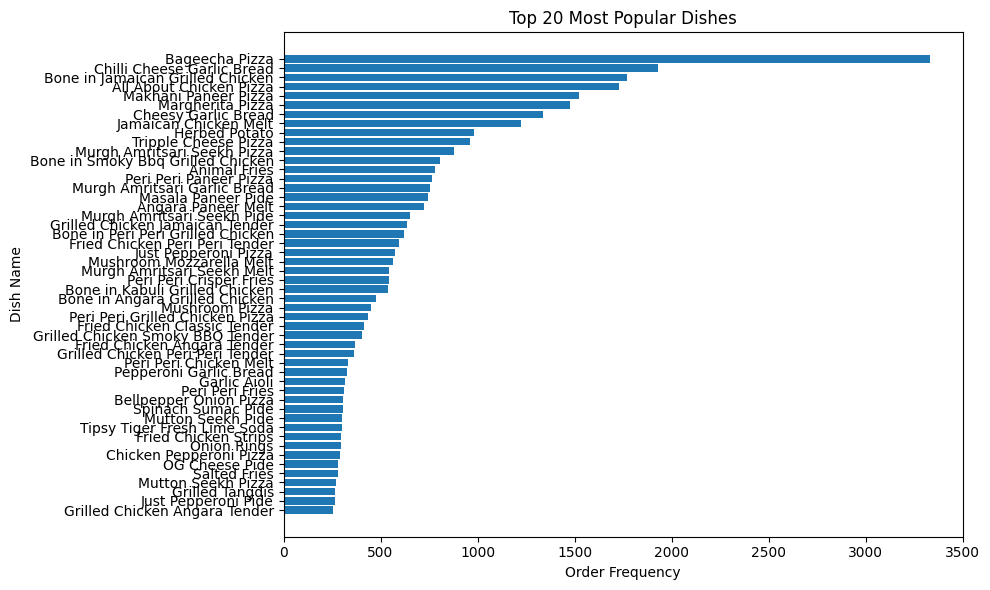

In [11]:
# --- Step 5: Plot top 20 items ---
plt.figure(figsize=(10,6))
plt.barh(item_counts["Item"].head(50)[::-1], item_counts["Order Frequency"].head(50)[::-1])
plt.title("Top 20 Most Popular Dishes")
plt.xlabel("Order Frequency")
plt.ylabel("Dish Name")
plt.tight_layout()
plt.show()

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [55]:
# get all unique day from order date
df["Order Placed At"].nunique()

19114

In [6]:
df["Subzone"].value_counts()

Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64

In [7]:
df["Restaurant name"].value_counts()


Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64

In [8]:
# Convert "Order Placed At" to datetime
df["Order_Datetime"] = pd.to_datetime(df["Order Placed At"], format="%I:%M %p, %B %d %Y")


In [9]:
# Get unique values in city and subzone
unique_cities = df["City"].unique()
unique_subzones = df["Subzone"].unique()
unique_cities, unique_subzones

(array(['Delhi NCR'], dtype=object),
 array(['Sector 4', 'Greater Kailash 2 (GK2)', 'DLF Phase 1', 'Sector 135',
        'Vasant Kunj', 'Shahdara', 'Sikandarpur', 'Chittaranjan Park'],
       dtype=object))

In [10]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Restaurant coordinates (approximate)
restaurant_coords = {
    "Aura Pizzas": [28.5866, 77.2230],
    "Swaad": [28.5734, 77.2581],
    "Dilli Burger Adda": [28.6620, 77.2365],
    "Tandoori Junction": [28.6098, 77.0923],
    "The Chicken Junction": [28.6412, 77.2163],
    "Masala Junction": [28.5309, 77.1466]
}

# Map lat/lon to df
df['rest_lat'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[0])
df['rest_lon'] = df['Restaurant name'].map(lambda x: restaurant_coords.get(x, [None, None])[1])

# Step 2: Convert Distance to float, handle <1 as 0.9
def clean_distance(d):
    if pd.isna(d):
        return np.nan
    d = d.replace('km','').strip()
    if d.startswith('<'):
        return 0.9  # assign 0.9 km for "<1"
    try:
        return float(d)
    except:
        return np.nan

df['Distance_km'] = df['Distance'].apply(clean_distance)

# Step 3: Aggregate average and max distances per restaurant
dist_stats = df.groupby('Restaurant name')['Distance_km'].agg(['mean','max']).reset_index()

# Step 4: Aggregate order counts per Subzone
orders_per_subzone = df.groupby('Subzone').size().reset_index(name='Orders')

# Approximate subzone centers
subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500]
}
orders_per_subzone['lat'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[0])
orders_per_subzone['lon'] = orders_per_subzone['Subzone'].map(lambda x: subzone_coords.get(x, [None, None])[1])

# Step 5: Create map
fig = go.Figure()

# Add restaurants
for _, row in dist_stats.iterrows():
    rest_name = row['Restaurant name']
    lat, lon = restaurant_coords[rest_name]
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=10, color='blue'),
        name=rest_name,
        hovertemplate=(
            f"{rest_name}<br>"
            f"Avg dist: {row['mean']:.2f} km<br>"
            f"Max dist: {row['max']:.2f} km"
        )
    ))
    
    # Add avg and max distance circles
    for dist, color, label in zip([row['mean'], row['max']], ['orange','red'], ['Avg','Max']):
        fig.add_trace(go.Scattermapbox(
            lat=[lat],
            lon=[lon],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=dist*10,  # scale factor for visibility
                color=color,
                opacity=0.2
            ),
            name=f"{rest_name} {label} Distance",
            showlegend=False
        ))

# Add subzone order counts
fig.add_trace(go.Scattermapbox(
    lat=orders_per_subzone['lat'],
    lon=orders_per_subzone['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=orders_per_subzone['Orders'], color='red', sizemode='area'),
    text=orders_per_subzone['Subzone'] + ': ' + orders_per_subzone['Orders'].astype(str) + ' orders',
    name='Orders per Subzone'
))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show()


/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/1976887965.py:56: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/1976887965.py:71: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/1976887965.py:85: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [11]:
import random

# --- Example restaurant_coords and subzone_coords (use your actual data) ---
restaurant_coords = {
    'Aura Pizzas': [28.55, 77.25],
    'Swaad': [28.59, 77.36],
    'Dilli Burger Adda': [28.50, 77.20],
    'Tandoori Junction': [28.53, 77.15],
    'The Chicken Junction': [28.52, 77.21],
    'Masala Junction': [28.57, 77.35]
}

subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500],
    'Shahdara': [28.6667, 77.2700],
    'Chittaranjan Park': [28.5530, 77.2580],
    'Sikandarpur': [28.4970, 77.0830]
}

# --- Your DataFrame `df` is already loaded ---
# Step 1: clean Distance column
df['Distance_km'] = df['Distance'].str.replace(r'\s*km','', regex=True)
df['Distance_km'] = df['Distance_km'].replace('<1', '0.9').astype(float)

# Step 2: aggregate delivery counts
delivery_counts = df.groupby(['Restaurant name','Subzone']).size().reset_index(name='count')

# Step 3: Prepare hover text for restaurants
restaurant_hover = {}
for rest in df['Restaurant name'].unique():
    deliveries = delivery_counts[delivery_counts['Restaurant name']==rest]
    hover_text = f"{rest}<br>Deliveries to sectors:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Subzone']}: {row['count']}<br>"
    restaurant_hover[rest] = hover_text

# Step 4: Prepare hover text for subzones
subzone_hover = {}
for sub in df['Subzone'].unique():
    deliveries = delivery_counts[delivery_counts['Subzone']==sub]
    hover_text = f"{sub}<br>Deliveries from restaurants:<br>"
    for _, row in deliveries.iterrows():
        hover_text += f"{row['Restaurant name']}: {row['count']}<br>"
    subzone_hover[sub] = hover_text

# --- Function to slightly jitter overlapping markers ---
def jitter(lat, lon, scale=0.0005):
    return lat + random.uniform(-scale, scale), lon + random.uniform(-scale, scale)

# Step 5: Plot
fig = go.Figure()

# Lines (constant thickness)
for _, row in delivery_counts.iterrows():
    r = row['Restaurant name']
    s = row['Subzone']
    fig.add_trace(go.Scattermapbox(
        lat=[restaurant_coords[r][0], subzone_coords[s][0]],
        lon=[restaurant_coords[r][1], subzone_coords[s][1]],
        mode='lines',
        line=go.scattermapbox.Line(width=4, color='green'),
        hoverinfo='none',
        showlegend=False
    ))

# Subzones (keep bigger for clarity)
for sub in subzone_coords:
    fig.add_trace(go.Scattermapbox(
        lat=[subzone_coords[sub][0]],
        lon=[subzone_coords[sub][1]],
        mode='markers',
        marker=go.scattermapbox.Marker(size=36, color='blue', opacity=0.7),
        name=sub,
        hoverinfo='text',
        hovertext=subzone_hover.get(sub, sub)
    ))

# Restaurants with jitter
for rest in restaurant_coords:
    lat, lon = jitter(restaurant_coords[rest][0], restaurant_coords[rest][1])
    fig.add_trace(go.Scattermapbox(
        lat=[lat],
        lon=[lon],
        mode='markers',
        marker=go.scattermapbox.Marker(size=12, color='red'),
        name=rest,
        hoverinfo='text',
        hovertext=restaurant_hover.get(rest, rest)
    ))

# Layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat":28.6139, "lon":77.2090},
    margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(font=dict(size=10)),
    height=900,
    width=1600
)

fig.show()


/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/415630738.py:61: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/415630738.py:72: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/415630738.py:85: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [12]:
df["Customer ID"].nunique()

11607

In [13]:
df_weather = df[["Order Placed At"]]

In [14]:
df_weather

,Order Placed At
0,"11:38 PM, September 10 2024"
1,"11:34 PM, September 10 2024"
2,"03:52 PM, September 10 2024"
3,"03:45 PM, September 10 2024"
4,"03:04 PM, September 10 2024"
...,...
21316,"03:26 AM, January 30 2025"
21317,"02:44 AM, January 29 2025"
21318,"10:05 PM, January 24 2025"
21319,"02:27 PM, January 21 2025"


In [15]:
df_weather["Order Datetime"] = pd.to_datetime(
    df_weather["Order Placed At"], 
    format="%I:%M %p, %B %d %Y"
)

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/1882046731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_weather.drop(columns=["Order Placed At"], inplace=True)

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/3133367414.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_weather

,Order Datetime
0,2024-09-10 23:38:00
1,2024-09-10 23:34:00
2,2024-09-10 15:52:00
3,2024-09-10 15:45:00
4,2024-09-10 15:04:00
...,...
21316,2025-01-30 03:26:00
21317,2025-01-29 02:44:00
21318,2025-01-24 22:05:00
21319,2025-01-21 14:27:00


In [18]:
# Remove the minutes and seconds and remove duplicates
df_weather["Order Datetime"] = df_weather["Order Datetime"].dt.floor('H')
df_weather = df_weather.drop_duplicates().reset_index(drop=True)

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/3071644783.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/var/folders/8h/9yyjtp8d7_zb27yf8xrdgxcr0000gn/T/ipykernel_72702/3071644783.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_weather

,Order Datetime
0,2024-09-10 23:00:00
1,2024-09-10 15:00:00
2,2024-09-10 12:00:00
3,2024-09-10 00:00:00
4,2024-09-09 22:00:00
...,...
2550,2025-01-21 15:00:00
2551,2025-01-21 11:00:00
2552,2025-01-29 02:00:00
2553,2025-01-22 17:00:00


In [20]:
# how many unique days are there?
df_weather["Order Datetime"].dt.date.nunique()

153

In [21]:
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,Order_Datetime,rest_lat,rest_lon,Distance_km
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2024-09-10 23:38:00,28.5734,77.2581,3.0
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2024-09-10 23:34:00,28.5734,77.2581,2.0
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,2024-09-10 15:52:00,28.5734,77.2581,0.9
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2024-09-10 15:45:00,28.5734,77.2581,2.0
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2024-09-10 15:04:00,28.5734,77.2581,2.0


In [22]:
import os
import pickle
from datetime import timedelta
from meteostat import Hourly, Point
from tqdm import tqdm

# -------------------------------------------------------
# 1️⃣ Cache Setup
# -------------------------------------------------------
CACHE_FILE = "weather_cache.pkl"

if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, "rb") as f:
        weather_cache = pickle.load(f)
else:
    weather_cache = {}

def save_cache():
    with open(CACHE_FILE, "wb") as f:
        pickle.dump(weather_cache, f)

# -------------------------------------------------------
# 2️⃣ Coordinates
# -------------------------------------------------------
restaurant_coords = {
    'Aura Pizzas': [28.55, 77.25],
    'Swaad': [28.59, 77.36],
    'Dilli Burger Adda': [28.50, 77.20],
    'Tandoori Junction': [28.53, 77.15],
    'The Chicken Junction': [28.52, 77.21],
    'Masala Junction': [28.57, 77.35]
}

subzone_coords = {
    'Greater Kailash 2 (GK2)': [28.5416, 77.2437],
    'Sector 4': [28.5900, 77.4000],
    'DLF Phase 1': [28.4590, 77.0300],
    'Sector 135': [28.5700, 77.3600],
    'Vasant Kunj': [28.5300, 77.1500],
    'Shahdara': [28.6667, 77.2700],
    'Chittaranjan Park': [28.5530, 77.2580],
    'Sikandarpur': [28.4970, 77.0830]
}

# -------------------------------------------------------
# 3️⃣ Weather Code Mapping
# -------------------------------------------------------
def map_weather_condition(code):
    """Simplify Meteostat COCO code to human-readable label."""
    if pd.isna(code):
        return np.nan
    code = int(code)
    if code in [1, 2]:
        return "Clear"
    elif code in [3, 4]:
        return "Cloudy"
    elif code in [6, 7, 8, 16]:
        return "Rainy"
    elif code in [9, 10]:
        return "Stormy"
    elif code in [5, 17]:
        return "Foggy"
    elif code in [11, 12, 13, 14, 15]:
        return "Snowy"
    else:
        return "Other"

# -------------------------------------------------------
# 4️⃣ Main Fetch Function (Cache-Aware)
# -------------------------------------------------------
def get_weather_for_time(lat, lon, timestamp):
    """Fetch hourly weather for given lat/lon and timestamp (with pickle caching)."""
    key = (round(lat, 3), round(lon, 3), timestamp.strftime("%Y-%m-%d %H"))
    if key in weather_cache:
        return weather_cache[key]

    location = Point(lat, lon)
    start = timestamp - timedelta(hours=1)
    end = timestamp + timedelta(hours=1)
    data = Hourly(location, start, end).fetch()

    if not data.empty:
        idx = np.argmin(np.abs((data.index - timestamp).total_seconds()))
        row = data.iloc[idx]

        result = {
            "temperature": row.get("temp", np.nan),
            "humidity": row.get("rhum", np.nan),
            "precipitation": row.get("prcp", 0),
            "wind_speed": row.get("wspd", np.nan),
            "weather_condition": map_weather_condition(row.get("coco", np.nan))
        }
    else:
        result = {
            "temperature": np.nan,
            "humidity": np.nan,
            "precipitation": 0,
            "wind_speed": np.nan,
            "weather_condition": np.nan
        }

    weather_cache[key] = result
    return result

# -------------------------------------------------------
# 5️⃣ Coordinate Helper
# -------------------------------------------------------
def get_coordinates(row):
    """Return coordinates based on Restaurant name or Subzone."""
    if row["Restaurant name"] in restaurant_coords:
        return restaurant_coords[row["Restaurant name"]]
    elif row["Subzone"] in subzone_coords:
        return subzone_coords[row["Subzone"]]
    else:
        return [28.6139, 77.2090]  # Default to Delhi NCR center

# -------------------------------------------------------
# 6️⃣ Fetch Weather for Each Order
# -------------------------------------------------------
records = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Fetching weather data"):
    lat, lon = get_coordinates(row)
    weather = get_weather_for_time(lat, lon, row["Order_Datetime"])
    weather["is_weekend_or_holiday"] = row["Order_Datetime"].weekday() >= 5
    records.append(weather)

# Build weather DataFrame
weather_df = pd.DataFrame(records)

# Drop existing weather columns if they exist to overwrite
for col in ["temperature", "humidity", "precipitation", "wind_speed", "weather_condition", "is_weekend_or_holiday"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Concatenate new weather columns
df = pd.concat([df.reset_index(drop=True), weather_df], axis=1)

save_cache()  # persist new results


Fetching weather data: 100%|██████████| 21321/21321 [00:00<00:00, 38349.82it/s]


In [23]:
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,Instructions,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,Order_Datetime,rest_lat,rest_lon,Distance_km,temperature,humidity,precipitation,wind_speed,weather_condition,is_weekend_or_holiday
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",NaN,40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2024-09-10 23:38:00,28.5734,77.2581,3.0,26.0,96.0,0.0,0.0,Cloudy,False
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",NaN,Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,2024-09-10 23:34:00,28.5734,77.2581,2.0,26.0,96.0,0.0,0.0,Cloudy,False
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,NaN,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,2024-09-10 15:52:00,28.5734,77.2581,0.9,26.1,95.0,0.0,0.0,Cloudy,False
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",NaN,40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2024-09-10 15:45:00,28.5734,77.2581,2.0,26.1,95.0,0.0,0.0,Cloudy,False
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",NaN,40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2024-09-10 15:04:00,28.5734,77.2581,2.0,26.1,95.0,0.0,0.0,Cloudy,False


In [24]:
df["Customer ID"].nunique()

11607

In [25]:
df.describe()

,Restaurant ID,Order ID,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order_Datetime,rest_lat,rest_lon,Distance_km,temperature,humidity,wind_speed
count,2.132100e+04,2.132100e+04,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,2491.000000,133.000000,3.0,21026.000000,21153.000000,21321,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000,21321.000000
mean,2.074413e+07,6.354622e+09,750.076838,32.564592,65.091816,31.795058,0.099128,3.039324,682.616113,4.356885,356.409549,0.0,17.332960,4.825070,2024-11-16 05:27:51.124243456,28.583659,77.232513,4.179687,18.433085,88.833169,1.562914
min,2.032061e+07,6.086767e+09,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,1.000000,83.580000,0.0,0.000000,0.100000,2024-09-01 00:13:00,28.530900,77.092300,0.900000,4.800000,35.000000,0.000000
25%,2.063570e+07,6.250751e+09,459.000000,18.450000,0.000000,0.000000,0.000000,0.000000,387.450000,4.000000,191.950000,0.0,13.380000,1.000000,2024-10-09 23:34:00,28.573400,77.223000,2.000000,12.000000,85.000000,0.000000
50%,2.065987e+07,6.357715e+09,629.000000,28.450000,80.000000,0.000000,0.000000,0.000000,597.450000,5.000000,272.580000,0.0,16.330000,3.100000,2024-11-15 23:38:00,28.586600,77.223000,3.000000,18.300000,92.000000,0.000000
75%,2.088265e+07,6.456827e+09,899.000000,39.950000,100.000000,0.000000,0.000000,0.000000,837.900000,5.000000,397.840000,0.0,20.050000,7.400000,2024-12-22 14:49:00,28.586600,77.258100,6.000000,25.200000,96.000000,1.800000
max,2.152306e+07,6.573392e+09,16080.000000,603.000000,4020.000000,7787.000000,280.100000,554.800000,12663.000000,5.000000,3236.980000,0.0,90.870000,73.800000,2025-01-31 23:59:00,28.662000,77.258100,21.000000,35.700000,100.000000,16.600000
std,2.447193e+05,1.230263e+08,498.759428,22.235898,85.401604,131.487091,3.264261,17.070780,465.313977,1.181472,328.128240,0.0,6.283388,4.982591,NaN,0.010773,0.020210,2.980514,7.108936,10.083045,2.404022


In [26]:
df.shape

(21321, 39)


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



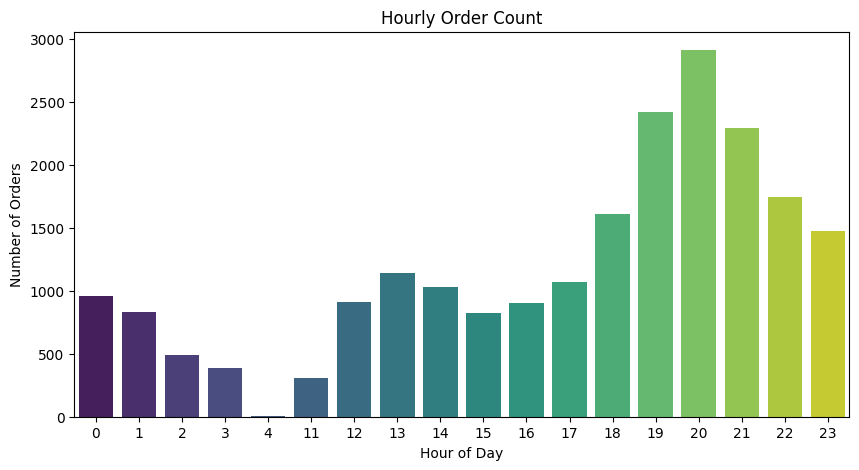

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df['hour'] = df['Order_Datetime'].dt.hour
orders_by_hour = df.groupby('hour')['Order ID'].count()

plt.figure(figsize=(10,5))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette="viridis")
plt.title("Hourly Order Count")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



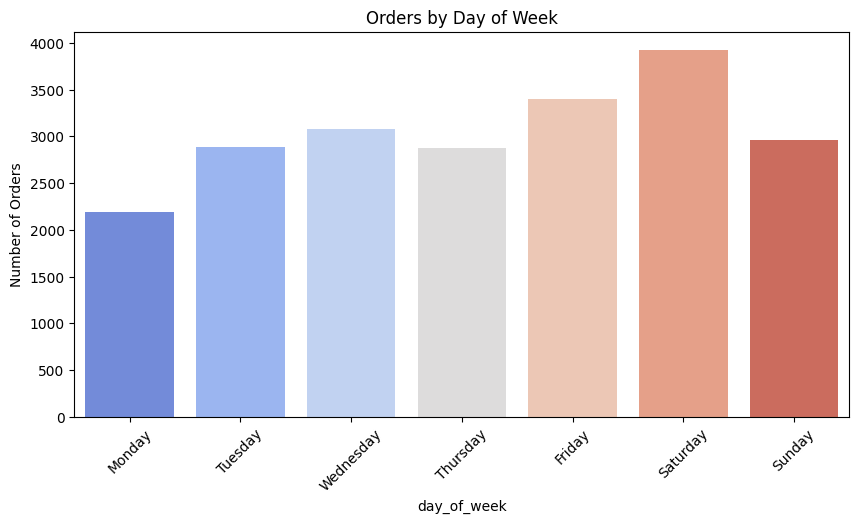

In [28]:
df['day_of_week'] = df['Order_Datetime'].dt.day_name()
orders_by_day = df.groupby('day_of_week')['Order ID'].count().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])

plt.figure(figsize=(10,5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="coolwarm")
plt.title("Orders by Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


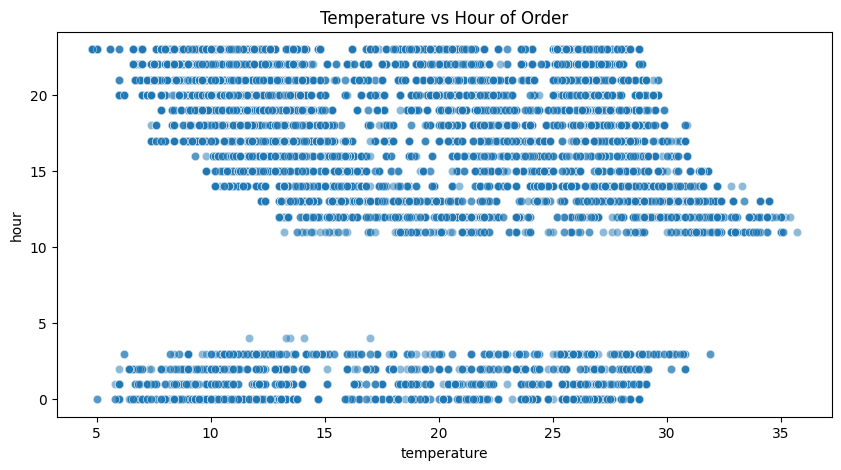

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temperature', y='hour', data=df, alpha=0.5)
plt.title("Temperature vs Hour of Order")
plt.show()


### Observations

1. **Two main clusters of hours**:

   * **Early morning / late night**: Hours 0–4, very few orders.
   * **Daytime / evening**: Hours 10–23, dense cluster — most orders happen here.

2. **Temperature range shifts with time**:

   * Early morning hours (0–4) have **lower temperatures** (~5–15°C), fewer orders.
   * Daytime hours (10–23) see **higher temperatures** (~15–35°C), dense order volume.

3. **Orders are concentrated in warm periods**:

   * Most orders occur when temperature is **roughly 15–30°C**.
   * Very few orders in cold (<10°C) or extremely hot (>35°C) temperatures.

4. **Scatterplot density**:

   * Overlap is high because there are **multiple orders per hour**.
   * Suggests a better visualization could be **line plot of average temperature per hour** or **bar plot of order counts per hour**, maybe with temperature as background.

---

### Preliminary deductions

* **Customer demand is heavily time-dependent**, peaking in daytime/evening.
* **Temperature may influence order volume**, but since temperature also follows a **daily cycle**, it may be partially confounded with hour-of-day effect.
* Early morning and late-night orders are rare regardless of temperature.


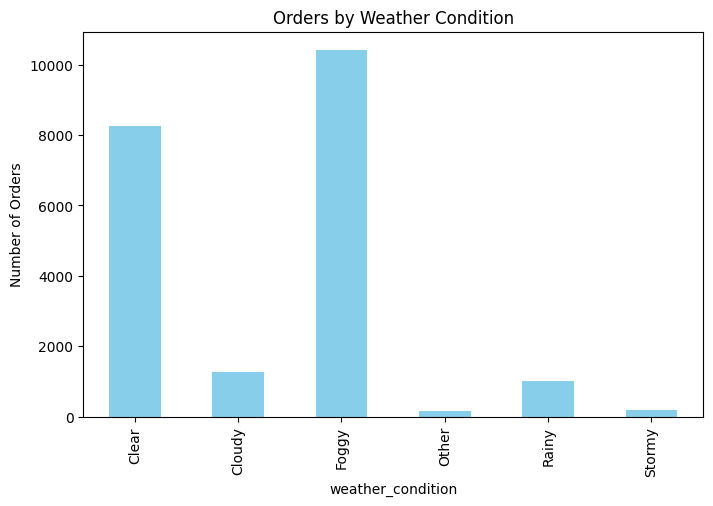

In [30]:
orders_weather = df.groupby('weather_condition')['Order ID'].count()
orders_weather.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Orders by Weather Condition")
plt.ylabel("Number of Orders")
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



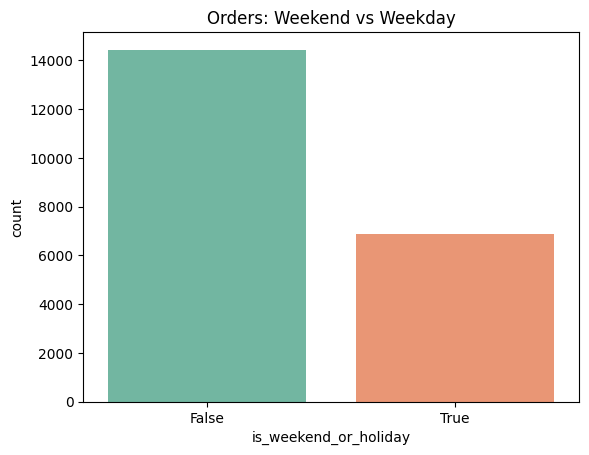

In [31]:
sns.countplot(x='is_weekend_or_holiday', data=df, palette="Set2")
plt.title("Orders: Weekend vs Weekday")
plt.show()

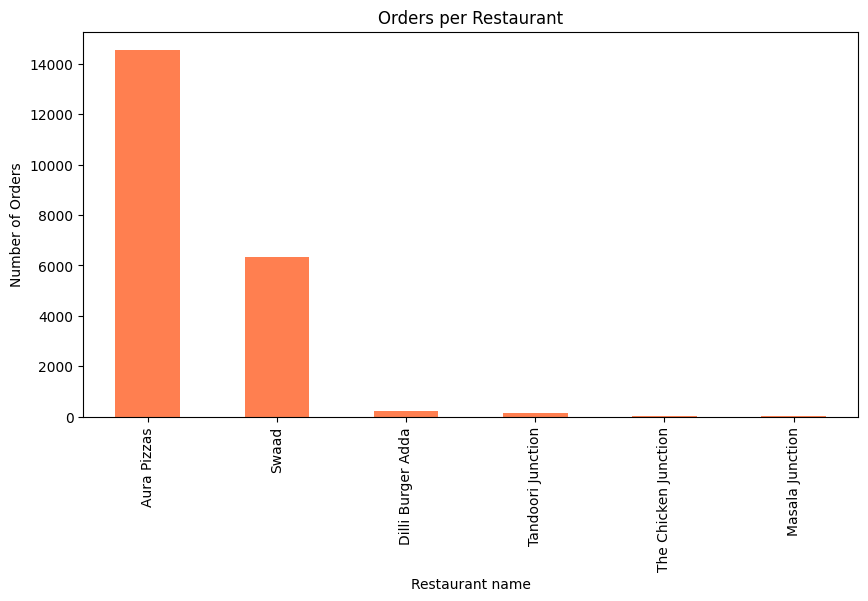

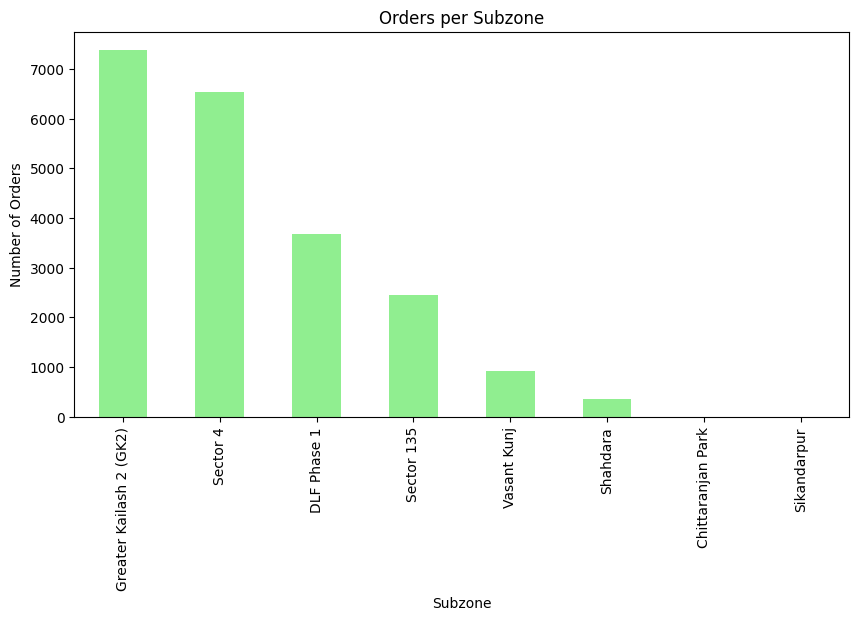

In [32]:
top_restaurants = df.groupby('Restaurant name')['Order ID'].count().sort_values(ascending=False)
top_restaurants.plot(kind='bar', figsize=(10,5), color='coral')
plt.title("Orders per Restaurant")
plt.ylabel("Number of Orders")
plt.show()

top_subzones = df.groupby('Subzone')['Order ID'].count().sort_values(ascending=False)
top_subzones.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title("Orders per Subzone")
plt.ylabel("Number of Orders")
plt.show()

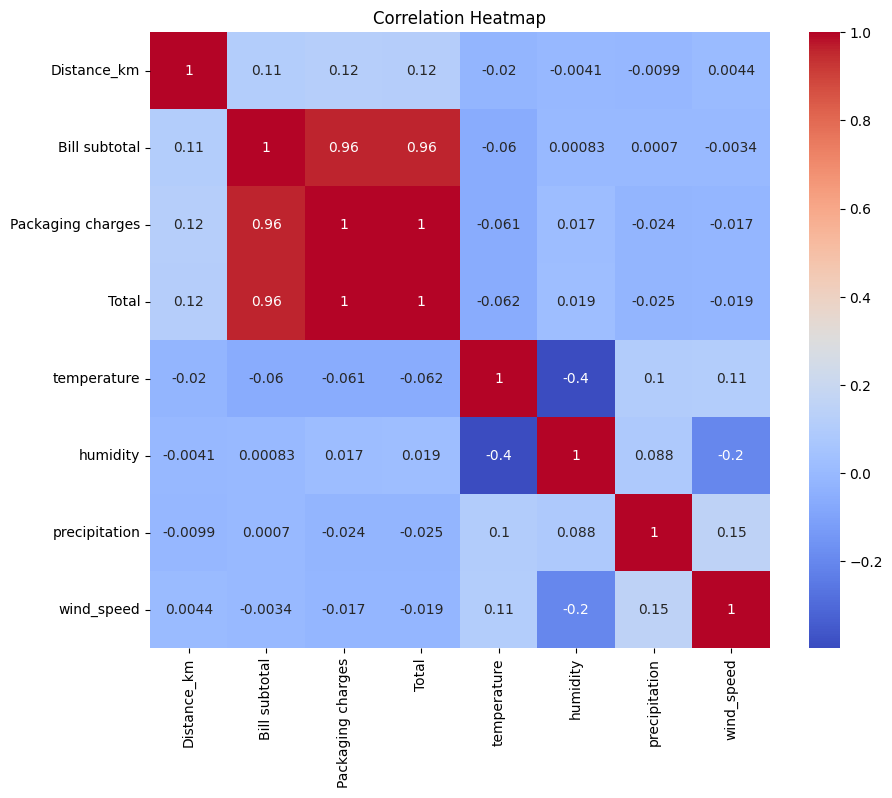

In [33]:
numeric_cols = ['Distance_km', 'Bill subtotal', 'Packaging charges', 'Total', 
                'temperature', 'humidity', 'precipitation', 'wind_speed']

# Convert to float and fill missing with np.nan
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


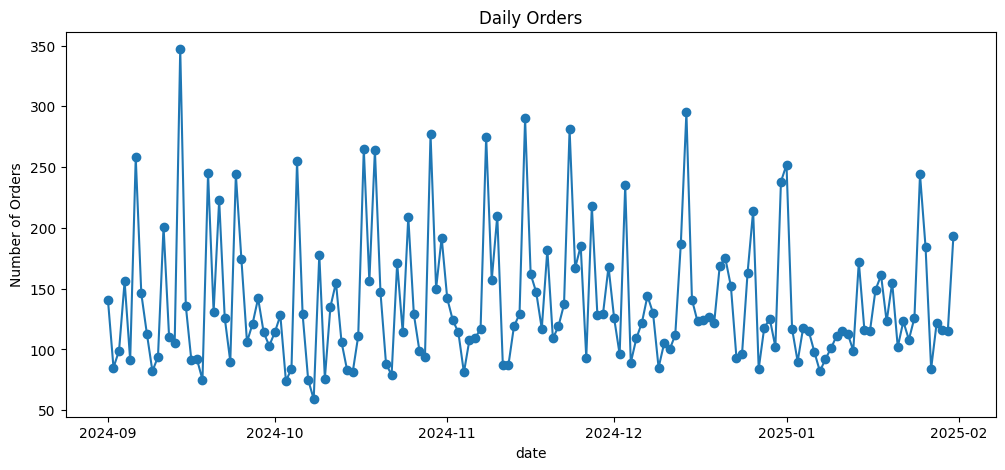

In [34]:
df['date'] = df['Order_Datetime'].dt.date
daily_orders = df.groupby('date')['Order ID'].count()
daily_orders.plot(figsize=(12,5), marker='o')
plt.title("Daily Orders")
plt.ylabel("Number of Orders")
plt.show()

In [35]:
# Hourly aggregation
df['hour'] = df['Order_Datetime'].dt.floor('H')
df['day_of_week'] = df['Order_Datetime'].dt.dayofweek  # 0=Mon, 6=Sun

In [36]:
cols_to_drop = [
    'Instructions',                   # a lot of missing values
    'Rating',                         # a lot of missing values
    'Review',                         # a lot of missing values
    'Cancellation / Rejection reason',# a lot of missing values
    'Restaurant compensation (Cancellation)', # a lot of missing values
    'Restaurant penalty (Rejection)',          # a lot of missing values
    'Customer complaint tag'           # a lot of missing values
]
df = df.drop(columns=cols_to_drop)

In [37]:
df.isna().sum()

Restaurant ID                                            0
Restaurant name                                          0
Subzone                                                  0
City                                                     0
Order ID                                                 0
Order Placed At                                          0
Order Status                                             0
Delivery                                                 0
Distance                                                 0
Items in order                                           0
Discount construct                                    5498
Bill subtotal                                            0
Packaging charges                                        0
Restaurant discount (Promo)                              0
Restaurant discount (Flat offs, Freebies & others)       0
Gold discount                                            0
Brand pack discount                                     

In [ ]:
# -------------------------------
# 3️⃣ Fill missing values only where relevant
# -------------------------------
# Numeric features
numeric_cols = [
    'precipitation', 'KPT duration (minutes)', 'Rider wait time (minutes)'
]
# Fill with 0 only where it makes sense
df['precipitation'] = df['precipitation'].fillna(0)
df['KPT duration (minutes)'] = df['KPT duration (minutes)'].fillna(df['KPT duration (minutes)'].median())
df['Rider wait time (minutes)'] = df['Rider wait time (minutes)'].fillna(df['Rider wait time (minutes)'].median())

# Distance / items
df['num_items'] = df['Items in order'].str.count('x')
df['Distance_km'] = df['Distance_km'].fillna(df['Distance_km'].median())

# Discounts / Bill (numeric)
discount_cols = [
    'Bill subtotal','Packaging charges','Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)','Gold discount','Brand pack discount','Total'
]
for col in discount_cols:
    df[col] = df[col].fillna(0)

# Categorical columns
df['Discount construct'] = df['Discount construct'].fillna('None')
df['weather_condition'] = df['weather_condition'].fillna('Unknown')


In [39]:
# -------------------------------
# 4️⃣ Encode categorical variables
# -------------------------------
cat_cols = ['Restaurant ID','Subzone','City','Delivery','Discount construct','weather_condition']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [40]:
# -------------------------------
# 5️⃣ Aggregate hourly for demand prediction
# -------------------------------
# Numeric features: mean per hour
numeric_features = [c for c in df.columns if df[c].dtype in [int,float] and c not in ['hour','day_of_week']]
X_hourly = df.groupby('hour')[numeric_features].mean().reset_index()

In [41]:
# Merge with target: orders per hour
y_hourly = df.groupby('hour').size().reset_index(name='orders')
data = X_hourly.merge(y_hourly, on='hour')

In [42]:
from sklearn.model_selection import train_test_split
# -------------------------------
# 6️⃣ Split features and target
# -------------------------------
features = data.drop(columns=['hour','orders'])
target = data['orders']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2044, 18)
X_test shape: (511, 18)
y_train shape: (2044,)
y_test shape: (511,)


In [43]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Target
y = target.values

# TimeSeries split
tscv = TimeSeriesSplit(n_splits=5)

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(features)


In [45]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    'Ridge': {'model': Ridge(), 'params': {'model__alpha': [0.01,0.1,1,10,100]}},
    'Lasso': {'model': Lasso(max_iter=10000, tol=1e-3, warm_start=True, random_state=42),
              'params': {'model__alpha':[0.001,0.01,0.1,1,10]}},
    'ElasticNet': {'model': ElasticNet(max_iter=10000, tol=1e-3, warm_start=True, random_state=42),
                   'params': {'model__alpha':[0.001,0.01,0.1,1], 'model__l1_ratio':[0.2,0.5,0.8]}}
}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

best_models = {}

for name, m in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    pipeline = Pipeline([
        ('model', m['model'])
    ])
    
    gsearch = GridSearchCV(
        estimator=pipeline,
        param_grid=m['params'],
        scoring='r2',
        cv=tscv,
        n_jobs=-1
    )
    
    gsearch.fit(X_poly_scaled, y)
    best_models[name] = gsearch.best_estimator_
    
    # Evaluate on first fold
    for train_index, test_index in tscv.split(X_poly_scaled):
        X_train, X_test = X_poly_scaled[train_index], X_poly_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        break
    
    y_pred = gsearch.best_estimator_.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Best Params: {gsearch.best_params_}")
    print(f"{name} RMSE: {rmse:.3f}")
    print(f"{name} R2: {r2:.3f}\n")


# RANDOM FOREST

In [ ]:
# Random Forest doesn't need scaling or polynomial features
X_rf = features.values  # use original features
y_rf = target.values

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)  # fixed seed for reproducibility

rf_params = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_rf = Pipeline([
    ('model', rf_model)
])

gsearch_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=rf_params,
    scoring='r2',
    cv=tscv,
    n_jobs=-1
)


In [ ]:
gsearch_rf.fit(X_rf, y_rf)
best_rf = gsearch_rf.best_estimator_
print("Best Random Forest Params:", gsearch_rf.best_params_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate on first fold
for train_index, test_index in tscv.split(X_rf):
    X_train, X_test = X_rf[train_index], X_rf[test_index]
    y_train, y_test = y_rf[train_index], y_rf[test_index]
    break  # just first fold

y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.3f}")
print(f"Random Forest R2: {r2:.3f}")


In [ ]:
# Random Forest feature importances
rf_importances = best_rf.named_steps['model'].feature_importances_

rf_df = pd.DataFrame({
    'Feature': features.columns,  # use original features for interpretability
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Top Features:")
print(rf_df.head(10))

# Plot top 10 feature importances
plt.figure(figsize=(10,5))
plt.barh(rf_df['Feature'].head(10), rf_df['Importance'].head(10))
plt.title("Random Forest Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Random Forest feature importances
rf_importances = best_rf.named_steps['model'].feature_importances_

rf_df = pd.DataFrame({
    'Feature': features.columns,  # use original features for interpretability
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Top Features:")
print(rf_df.head(10))

# Plot top 10 feature importances
plt.figure(figsize=(10,5))
plt.barh(rf_df['Feature'].head(10), rf_df['Importance'].head(10))
plt.title("Random Forest Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()
